In [4]:
import pandas as pd
import numpy as np
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from imageio import imread


points_json = pd.read_json('django-labeller/images/10270_JeepGrand Cherokee2015_2400__labels.json')

In [5]:
points_json

,image_filename,complete,labels
0,10270_JeepGrand Cherokee2015_2400.png,NaN,"{'label_type': 'polygon', 'label_class': 'wind..."
1,10270_JeepGrand Cherokee2015_2400.png,NaN,"{'label_type': 'polygon', 'label_class': 'lice..."


In [6]:
df = pd.json_normalize(points_json['labels'])
df

,label_type,label_class,source,regions,object_id,anno_data.good_quality,anno_data.visibility
0,polygon,window,manual,"[[{'x': 1226.9359716332294, 'y': 641.950459303...",c51c8ca5-4a5c-4b42-8129-1fc1ed7af3a6__10,True,mostly
1,polygon,license,manual,"[[{'x': 1116.699610152405, 'y': 841.3785531725...",c51c8ca5-4a5c-4b42-8129-1fc1ed7af3a6__11,True,full


In [17]:
window = pd.json_normalize(df['regions'][0][1])
window_array = np.array(window)

In [18]:
plate = pd.json_normalize(df['regions'][1][0])
plate_array = np.array(plate)

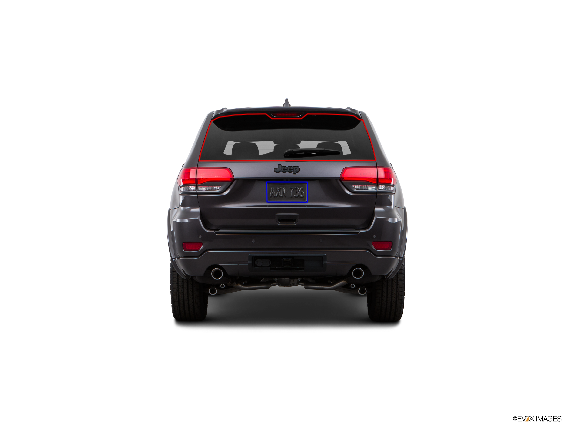

In [19]:
image_path = './django-labeller/images/10270_JeepGrand Cherokee2015_2400.png'
image = imread(image_path)

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.imshow(image)
window_poly = Polygon(window_array, closed=True, ec='r', fill=False)
plate_poly = Polygon(plate_array, closed=True, ec='b', fill=False)
ax1.add_patch(window_poly)
ax1.add_patch(plate_poly)
plt.axis('off');

img_pts = [(x,y) for y in range(img.shape[1]) for x in range(img.shape[0])] or something.  May have to invert y and perhaps swap x and y.  I forget.

In [20]:
image.shape

(1800, 2400, 4)

In [21]:
img_pts = [(x,y) for y in range(image.shape[0]) for x in range(image.shape[1])]


In [30]:
plate_array_path = mplPath.Path(plate_array)
plate_points = plate_array_path.contains_points(img_pts, radius=0.1)
plate_binary = np.array(plate_points.reshape(1800,2400))

In [34]:
window_array_path = mplPath.Path(window_array)
window_points = window_array_path.contains_points(img_pts, radius=0.1)
window_binary = np.array(window_points.reshape(1800,2400), dtype='int')

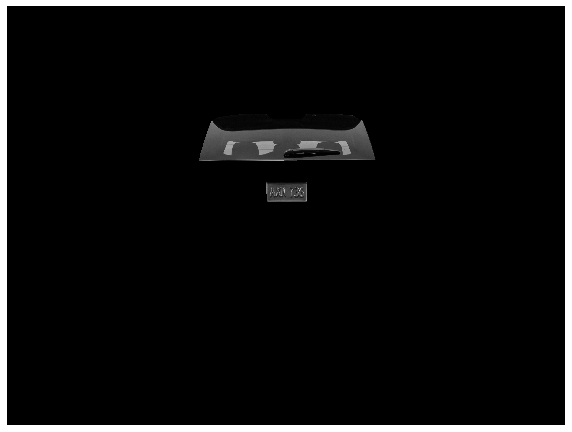

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(image[:,:,0] * (window_binary + plate_binary), cmap='gray')
plt.axis('off');

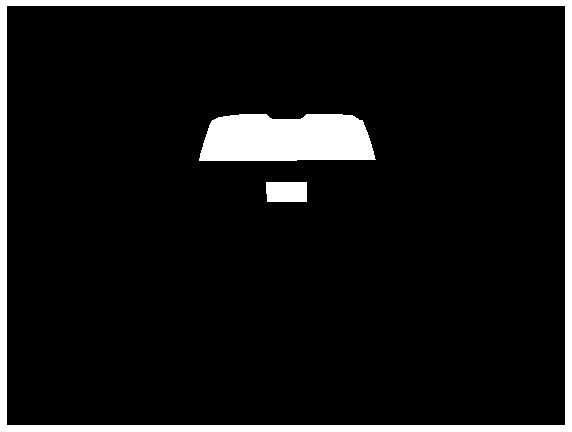

In [37]:
plt.figure(figsize=(10,10))
plt.imshow((window_binary + plate_binary), cmap='gray')
plt.axis('off');

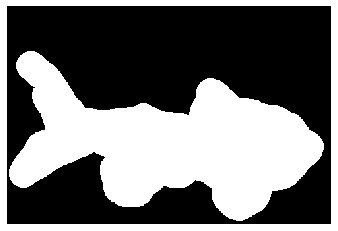

In [58]:
segnet_gt_example = imread('/Users/DanCassin/Downloads/MicrosoftTeams-image.png')
segnet_gt_example = np.array(segnet_gt_example, dtype='int')
plt.imshow(segnet_gt_example==0, cmap='gray')
plt.axis('off');

In [61]:
len(segnet_gt_example)

323

In [62]:
segnet_gt_example.shape

(323, 481)

In [87]:
# How to change classes using np.where(if condition, what to do, else statement)
segnet_gt_example_2 = np.where(segnet_gt_example==0, segnet_gt_example+1, segnet_gt_example)
            

In [88]:
segnet_gt_example_2

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

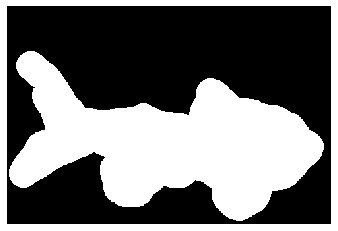

In [91]:
plt.imshow(segnet_gt_example_2==1, cmap='gray')
plt.axis('off');